## Name: Muhammad Haris Uddin Siddiqui
### The sparks Foundation
#### Task 2: Prediction using Unsupervised ML
**Predict the optimum number of clusters and represent it visually.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data

iris_data = pd.DataFrame(X, columns = iris.feature_names)
print("The shape of the dataset is: ", iris_data.shape)
iris_data.head()

The shape of the dataset is:  (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Determining K
For K-Means clustering, we need to know the value of K, i.e. the number of clusters, beforehand. But, how do we determine K? This is where we use something called the Elbow Method.

In the Elbow Method, we plot a graph between the number of clusters and the Within-Cluster-Sum-of-Squares (WCSS).

WCSS can be defined as:

𝑊𝐶𝑆𝑆=∑𝑖=1𝑘∑𝑥𝑗∈𝐶𝑖𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒(𝑥𝑗,𝜇𝐶𝑖)2
 
where,
k is the number of clusters.
𝑥𝑗  represents elements of a cluster  𝐶𝑖 .
𝜇𝐶𝑖  represents the centroid of a cluster  𝐶𝑖 .

If we were to take K to be equal to the number of data points, then WCSS would be zero. In such a case, each data point would act as a centroid, making the WCSS zero.

Let's take a look and understand how the Elbow Method works.



In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 60)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

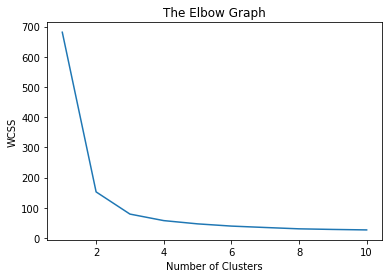

In [7]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


From the graph, we can see that with an increase in the number of clusters, the WCSS value decreases. We select the value for K on the basis of the rate of decrease in WCSS. The optimal number of clusters is where the elbow occurs. In the above graph, we see a huge drop in WCSS before 3. After 3, the drop is minimal. Therefore, the optimal number of clusters is 3, i.e. K = 3.

## Training the Algorithum

In [10]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , random_state = 60)
y = kmeans.fit_predict(X)

## Visualising the Clusters

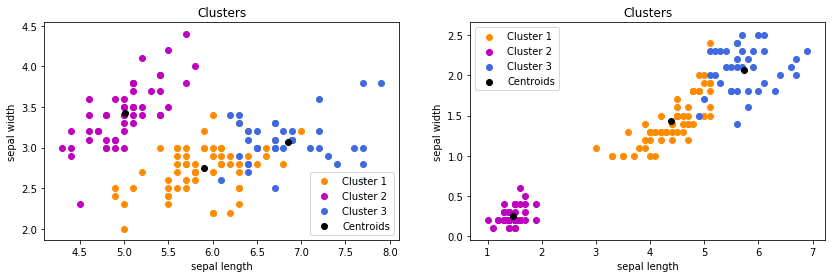

In [15]:
f, (ax1,ax2) = plt.subplots(1,2,figsize= (14,4))

ax1.scatter(X[y == 0,0] , X[y == 0,1], c = "darkorange" , label = "Cluster 1")
ax1.scatter(X[y == 1,0] , X[y == 1,1], c = "m", label = "Cluster 2")
ax1.scatter(X[y== 2,0] , X[y == 2,1], c= "royalblue" , label = "Cluster 3")

centers = kmeans.cluster_centers_
ax1.scatter(centers[:,0],centers[: ,1],c = "black" , label = "Centroids")

ax1.title.set_text('Clusters')
ax1.set_xlabel('sepal length')
ax1.set_ylabel('sepal width')
ax1.legend()

ax2.scatter(X[y == 0,2] , X[y == 0,3], c = "darkorange" , label = "Cluster 1")
ax2.scatter(X[y == 1,2] , X[y == 1,3], c = "m", label = "Cluster 2")
ax2.scatter(X[y== 2,2] , X[y == 2,3], c= "royalblue" , label = "Cluster 3")

centers = kmeans.cluster_centers_
ax2.scatter(centers[:,2],centers[: ,3],c = "black" , label = "Centroids")

ax2.title.set_text('Clusters')
ax2.set_xlabel('sepal length')
ax2.set_ylabel('sepal width')
ax2.legend()

plt.show()

With this, we have been successful in performing K-means Clustering on the Iris dataset!

Note that we have plotted 2D graphs for sepals and petals individually, for ease of visualization, because a 4D scatter plot would be hard to visualize.